In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
data_source = 'https://covidtracking.com/api/us/daily.csv'

In [4]:
df = pd.read_csv(data_source)

In [5]:
df.shape

(16, 8)

In [6]:
df.tail()

,date,states,positive,negative,posNeg,pending,death,total
11,20200315,51,3173,22548,25721,2242,60.0,27963
12,20200316,56,4019,35840,39859,1691,71.0,41550
13,20200317,56,5723,47604,53327,1687,90.0,54957
14,20200318,56,7731,66225,73956,2538,112.0,76495
15,20200319,56,11723,89197,100920,3025,160.0,103945


In [7]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [8]:
max(df['date'])

Timestamp('2020-03-19 00:00:00')

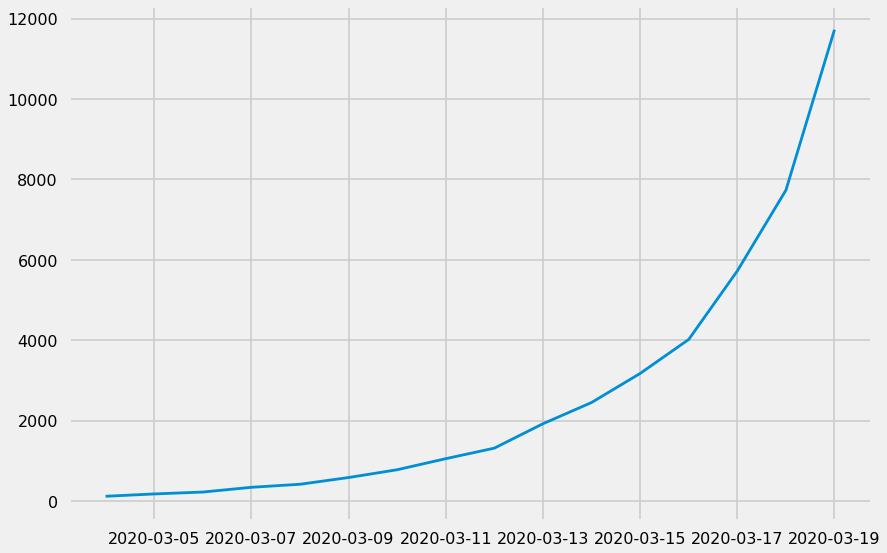

In [9]:
plt.plot(df['date'], df['positive'])